### <b>Assignment 1 - Part 2 - C263H </b>
##### <b>Student</b>: Erin Jones
##### <b>Deadline</b>: 9/14/2023 (48 hr grace period)
##### <b>Last Edit Made</b>: 9/16/2023

In [1]:
# IMPORTS
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math

# READ IN DATA
# Note - Data must be in same dir as notebook!
nodez = pd.read_csv("nodes_c263h.csv")
rand_nodez = pd.read_csv("c263h_links_random.csv")
acq_nodez = pd.read_csv("ce263h_links_acquaintances.csv")

In [2]:
def find_graph_characteristics(nx_graph):
    # num nodes
    n = nx_graph.number_of_nodes()
    # num edges
    m = nx_graph.number_of_edges()
    # avg degree
    k = (2*m)/n
    # clustering coefficient
    c = nx.average_clustering(nx_graph)
    # shortest path
    l = nx.average_shortest_path_length(nx_graph)
    return n, m, k, c, l

## Random Links Graphs

The below cells show the creation of an undirected graph, the Erdos-Renyi graph, and the small world/Watts-Strogatz graph for the c263h_links_random.csv graph

In [3]:
# Create and analyze undirected graph from the random links csv

g_rand = nx.Graph()

# Make graph from dataframe
for index, row in rand_nodez.iterrows():
    source_node = row['source']
    target_node = row['target']
    if source_node != target_node:
        g_rand.add_edge(source_node, target_node)

# Remove disconnected nodes
deg = g_rand.degree()
to_keep = []
for node in g_rand.nodes():
    if deg[node] == 0:
        g_rand.remove_node(node)

# Empirical 

r_graph_stats = find_graph_characteristics(g_rand)
print(f"Random Graph:\nNumber of nodes: {r_graph_stats[0]} \nNumber of edges: {r_graph_stats[1]} \nAverage degree: {r_graph_stats[2]} \nAverage Clustering Coefficient: {r_graph_stats[3]} \nAverage Shortest Path: {r_graph_stats[4]}")

# Erdos-Renyi Random

p_rg = (r_graph_stats[2])/(r_graph_stats[0] - 1)
er_rand = nx.erdos_renyi_graph(r_graph_stats[0], p_rg, seed=None, directed=False)

er_graph_stats = find_graph_characteristics(er_rand)
print(f"\nErdos-Renyi Graph:\nNumber of nodes: {er_graph_stats[0]} \nNumber of edges: {er_graph_stats[1]} \nAverage degree: {er_graph_stats[2]} \nAverage Clustering Coefficient: {er_graph_stats[3]} \nAverage Shortest Path: {er_graph_stats[4]}")


# Small World

# round k down to 10
C0_r =  nx.average_clustering(nx.watts_strogatz_graph( r_graph_stats[0], 10, 0 ))
p_sw =1-pow(0.5/C0_r,1/3) 

# Construct the network
sw_rand = nx.watts_strogatz_graph(r_graph_stats[0], 10, p_sw)

sw_graph_stats = find_graph_characteristics(sw_rand)
print(f"\nSmall World Graph:\nNumber of nodes: {sw_graph_stats[0]} \nNumber of edges: {sw_graph_stats[1]} \nAverage degree: {sw_graph_stats[2]} \nAverage Clustering Coefficient: {sw_graph_stats[3]} \nAverage Shortest Path: {sw_graph_stats[4]}")


Random Graph:
Number of nodes: 58 
Number of edges: 293 
Average degree: 10.10344827586207 
Average Clustering Coefficient: 0.15133161857299787 
Average Shortest Path: 1.955837870538415

Erdos-Renyi Graph:
Number of nodes: 58 
Number of edges: 290 
Average degree: 10.0 
Average Clustering Coefficient: 0.1557194720987824 
Average Shortest Path: 1.957652752571083

Small World Graph:
Number of nodes: 58 
Number of edges: 290 
Average degree: 10.0 
Average Clustering Coefficient: 0.507293568500465 
Average Shortest Path: 2.2607380520266185


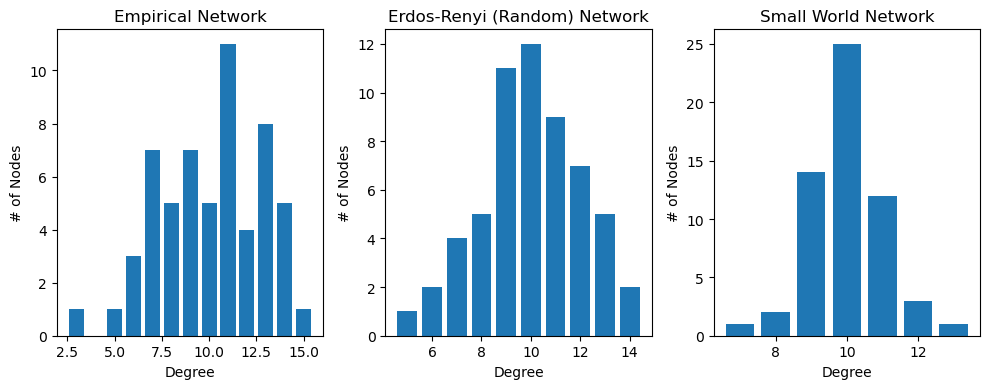

In [6]:
# Create Plot - Class Random Nodes
degree_sequence_emp = sorted((d for n, d in g_rand.degree()), reverse=True)
degree_sequence_er = sorted((d for n, d in er_rand.degree()), reverse=True)
degree_sequence_sw = sorted((d for n, d in sw_rand.degree()), reverse=True)


# max value from the listed degrees in the sequence
dmax_emp = max(degree_sequence_emp)
dmax_er = max(degree_sequence_er)
dmax_sw = max(degree_sequence_sw)

# instatiate a matplotlib figure
fig = plt.figure("Degree Histograms - Random Class Nodes", figsize=(10, 4))

# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(3, 6)

# random network degree histogram
ax1 = fig.add_subplot(axgrid[:, :2])
ax1.bar(*np.unique(degree_sequence_emp, return_counts=True))
ax1.set_title("Empirical Network")
ax1.set_xlabel("Degree")
ax1.set_ylabel("# of Nodes")

# acquaintances network degree histogram
ax2 = fig.add_subplot(axgrid[:, 2:4])
ax2.bar(*np.unique(degree_sequence_er, return_counts=True))
ax2.set_title("Erdos-Renyi (Random) Network")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

# acquaintances network degree histogram
ax2 = fig.add_subplot(axgrid[:, 4:])
ax2.bar(*np.unique(degree_sequence_sw, return_counts=True))
ax2.set_title("Small World Network")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

## Acquaintances Links Graphs

The below cells show the creation of an undirected graph, the Erdos-Renyi graph, and the small world/Watts-Strogatz graph for the ce263h_links_acquaintances.csv graph

In [15]:
# Create and analyze an undirected graph from the acquaintances links csv
g_acq = nx.Graph()

# Make graph from dataframe
for index, row in acq_nodez.iterrows():
    source_node = row['source ']
    target_node = row['target']
    if source_node != target_node:
        g_acq.add_edge(source_node, target_node)
        
# Remove disconnected nodes -- I ran this code once and there are none, so I am commenting it out
deg = g_acq.degree()
for node in g_acq.nodes():
    if deg[node] == 0:
        g_acq.remove_node(node)

# Empirical 
r_graph_stats = find_graph_characteristics(g_acq)
print(f"Random Graph:\nNumber of nodes: {r_graph_stats[0]} \nNumber of edges: {r_graph_stats[1]} \nAverage degree: {r_graph_stats[2]} \nAverage Clustering Coefficient: {r_graph_stats[3]} \nAverage Shortest Path: {r_graph_stats[4]}")

# Erdos-Renyi Random

p_rg = (r_graph_stats[2])/(r_graph_stats[0] - 1)
er_acq = nx.erdos_renyi_graph(r_graph_stats[0], p_rg, seed=None, directed=False)

er_graph_stats = find_graph_characteristics(er_acq)
print(f"\nErdos-Renyi Graph:\nNumber of nodes: {er_graph_stats[0]} \nNumber of edges: {er_graph_stats[1]} \nAverage degree: {er_graph_stats[2]} \nAverage Clustering Coefficient: {er_graph_stats[3]} \nAverage Shortest Path: {er_graph_stats[4]}")


# Small World

# round k down to 4
C0_r =  nx.average_clustering(nx.watts_strogatz_graph((r_graph_stats[0]), 4, 0))
p_sw =1-pow(0.5/C0_r,1/3) 

# Construct the network
sw_acq = nx.watts_strogatz_graph(r_graph_stats[0], 4, p_sw)

sw_graph_stats = find_graph_characteristics(sw_acq)
print(f"\nSmall World Graph:\nNumber of nodes: {sw_graph_stats[0]} \nNumber of edges: {sw_graph_stats[1]} \nAverage degree: {sw_graph_stats[2]} \nAverage Clustering Coefficient: {sw_graph_stats[3]} \nAverage Shortest Path: {sw_graph_stats[4]}")

Random Graph:
Number of nodes: 53 
Number of edges: 122 
Average degree: 4.60377358490566 
Average Clustering Coefficient: 0.3940401317759808 
Average Shortest Path: 3.332365747460087

Erdos-Renyi Graph:
Number of nodes: 53 
Number of edges: 122 
Average degree: 4.60377358490566 
Average Clustering Coefficient: 0.11620245582509733 
Average Shortest Path: 2.7336719883889695

Small World Graph:
Number of nodes: 53 
Number of edges: 106 
Average degree: 4.0 
Average Clustering Coefficient: 0.5 
Average Shortest Path: 7.0


The numbers that I was seeing for the small world netowrk on the acquaintances graph seemed really weird and so I decided to do a deeper exploration and manually code the p-value as the issue seemed to be stemming from the p calculation that I took from the sw_vs_models.ipynb. It was spitting out a p value of zero, which does not seem to be the case based on the below anlaysis

0.0 0.5


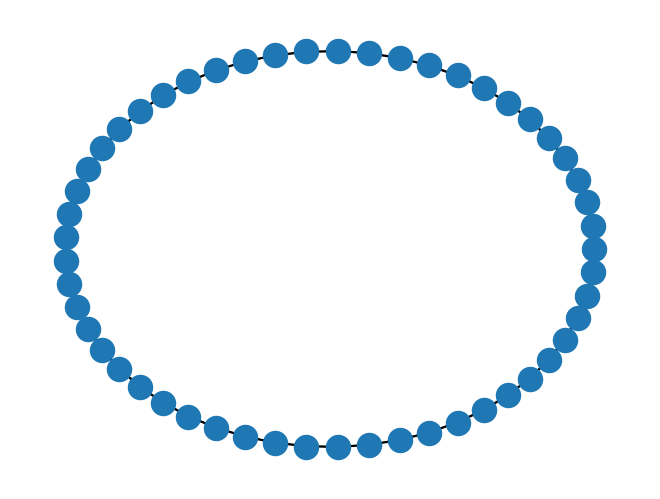

In [24]:
# Just evidence that weird stuff is going on!
nx.draw_circular(sw_acq)
print(p_sw, C0_r)

In [20]:
##### Watts-Strogatz model parameters #####
import sys

# Number of nodes (graph vertices)
n=53
# Degree of the initial ring-lattice
k=4
# Resolution (number of different values of p, the rewiring probability)
r = 20

# Generate a set of r logarithmically spaced values of p
p_range=[0] + np.logspace( -4, 0, r ).tolist()

###### For each p, compute the characterstic measures of the Watt-Strogatz model (n,k,p) ####
clustering = []
sp_length  = []

for p in p_range:
    
    # Create a Watts-Strogatz graph
    graph = nx.watts_strogatz_graph( n, k, p )
    
    # Compute the average shortest-path length L(p)
    sp_length.append( nx.average_shortest_path_length( graph ) )

    # Compute the clustering coefficient C(p)
    clustering.append( nx.average_clustering( graph ) )

    print("[p=%.4f]: Clustering coefficient C(p)=%.4f,  Avg shortest path L(p)=%.4f" % (p, clustering[-1], sp_length[-1])) 
    sys.stdout.flush()

[p=0.0000]: Clustering coefficient C(p)=0.5000,  Avg shortest path L(p)=7.0000
[p=0.0001]: Clustering coefficient C(p)=0.5000,  Avg shortest path L(p)=7.0000
[p=0.0002]: Clustering coefficient C(p)=0.5000,  Avg shortest path L(p)=7.0000
[p=0.0003]: Clustering coefficient C(p)=0.5000,  Avg shortest path L(p)=7.0000
[p=0.0004]: Clustering coefficient C(p)=0.5000,  Avg shortest path L(p)=7.0000
[p=0.0007]: Clustering coefficient C(p)=0.5000,  Avg shortest path L(p)=7.0000
[p=0.0011]: Clustering coefficient C(p)=0.5000,  Avg shortest path L(p)=7.0000
[p=0.0018]: Clustering coefficient C(p)=0.4805,  Avg shortest path L(p)=6.3570
[p=0.0030]: Clustering coefficient C(p)=0.5000,  Avg shortest path L(p)=7.0000
[p=0.0048]: Clustering coefficient C(p)=0.5000,  Avg shortest path L(p)=7.0000
[p=0.0078]: Clustering coefficient C(p)=0.4805,  Avg shortest path L(p)=5.7787
[p=0.0127]: Clustering coefficient C(p)=0.4931,  Avg shortest path L(p)=6.0181
[p=0.0207]: Clustering coefficient C(p)=0.4321,  Avg

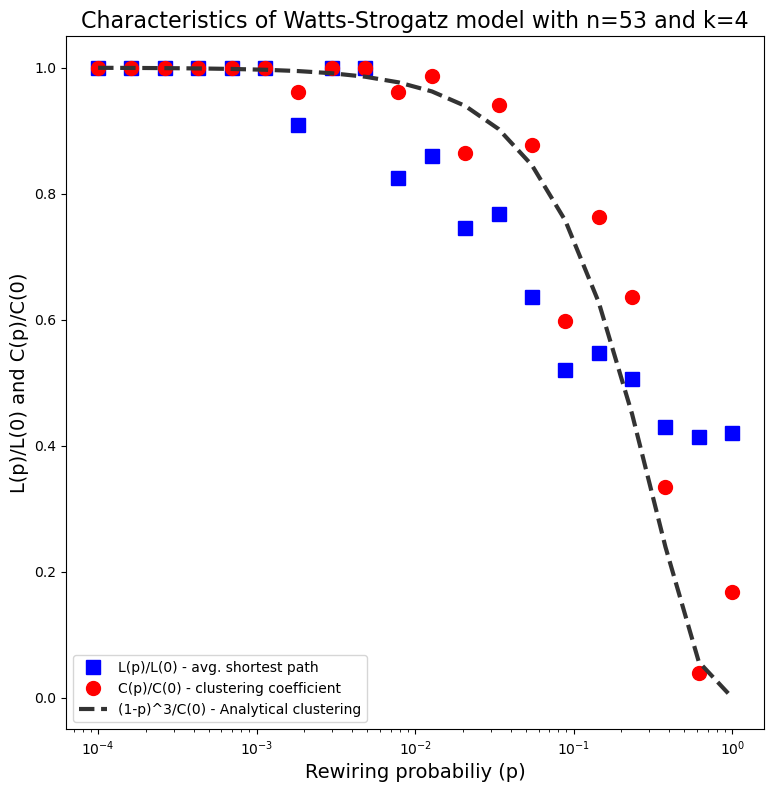

In [21]:
##### Plot L(p)/L(0) and C(p)/C(0) #####
plt.figure(1,figsize=(9,9))

plt.semilogx(p_range[1:] , [L / sp_length[0]  for L in sp_length[1:]]  , 'sb', markersize=10, label='L(p)/L(0) - avg. shortest path')
plt.semilogx(p_range[1:] , [C / clustering[0] for C in clustering[1:]] , 'or', markersize=10, label='C(p)/C(0) - clustering coefficient')
plt.semilogx(p_range[1:] , [ (1-p)**3.0 for p in p_range[1:]] , '--', color=[0.2,0.2,0.2], linewidth=3, markersize=12, label='(1-p)^3/C(0) - Analytical clustering')


plt.title( "Characteristics of Watts-Strogatz model with n=%d and k=%d"%(n,k) , fontsize=16)
plt.xlabel( "Rewiring probabiliy (p)" , fontsize=14)
plt.ylabel( "L(p)/L(0) and C(p)/C(0)" , fontsize=14)
plt.legend( loc='best' )
plt.show()

In [28]:
# Based on the above information, lets redefine out small world network before plotting

# Small World

# Construct the network
C_p = 0.4384
C_0 = nx.average_clustering(nx.watts_strogatz_graph((r_graph_stats[0]), 4, 0))
p = ((((C_p/C_0)**(1/3)) - 1) * -1)

# Construct the network
sw_acq = nx.watts_strogatz_graph(53, 4, p)

sw_graph_stats = find_graph_characteristics(sw_acq)
print(f"\nSmall World Graph:\nNumber of nodes: {sw_graph_stats[0]} \nNumber of edges: {sw_graph_stats[1]} \nAverage degree: {sw_graph_stats[2]} \nAverage Clustering Coefficient: {sw_graph_stats[3]} \nAverage Shortest Path: {sw_graph_stats[4]}")


Small World Graph:
Number of nodes: 53 
Number of edges: 106 
Average degree: 4.0 
Average Clustering Coefficient: 0.479874213836478 
Average Shortest Path: 5.306966618287373


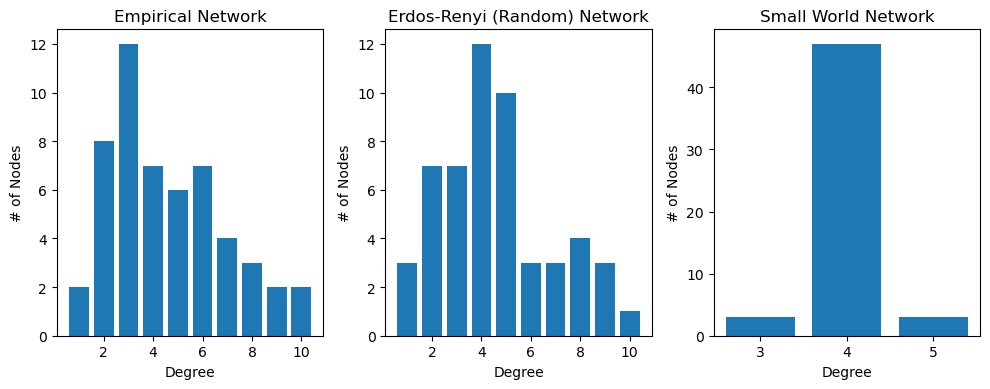

In [29]:
# Create Plot - Class Random Nodes
degree_sequence_emp = sorted((d for n, d in g_acq.degree()), reverse=True)
degree_sequence_er = sorted((d for n, d in er_acq.degree()), reverse=True)
degree_sequence_sw = sorted((d for n, d in sw_acq.degree()), reverse=True)


# max value from the listed degrees in the sequence
dmax_emp = max(degree_sequence_emp)
dmax_er = max(degree_sequence_er)
dmax_sw = max(degree_sequence_sw)

# instatiate a matplotlib figure
fig = plt.figure("Degree Histograms - Acquaintances Nodes", figsize=(10, 4))

# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(3, 6)

# random network degree histogram
ax1 = fig.add_subplot(axgrid[:, :2])
ax1.bar(*np.unique(degree_sequence_emp, return_counts=True))
ax1.set_title("Empirical Network")
ax1.set_xlabel("Degree")
ax1.set_ylabel("# of Nodes")

# acquaintances network degree histogram
ax2 = fig.add_subplot(axgrid[:, 2:4])
ax2.bar(*np.unique(degree_sequence_er, return_counts=True))
ax2.set_title("Erdos-Renyi (Random) Network")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

# acquaintances network degree histogram
ax2 = fig.add_subplot(axgrid[:, 4:])
ax2.bar(*np.unique(degree_sequence_sw, return_counts=True))
ax2.set_title("Small World Network")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()